### Vision por computadora - Procesamiento de Imagenes

*Gina Martínez López*

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
img = cv2.imread('Billboard.jpg')
img_inicial= cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Pasa la imagen de BGR a RGB

In [3]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) #Pasa la imagen de BGR a HSV
M,N,C = img_hsv.shape
print("Tamaño MX N RG: ", N, "x", M) #Se observa el tamaño

Tamaño MX N RG:  1600 x 1200


In [4]:
Matriz_Value=img_hsv[:,:,2]  #Se accede al Value de la imagen HSV
Value= cv2.equalizeHist(Matriz_Value) #Se ecualiza solo el valor Value de la imagen HSV
Gauss = cv2.GaussianBlur(Value,(5,5),cv2.BORDER_DEFAULT) #Se aplica filtro Gaussiano de 5X5 a la imagen Value
img_hsv[:,:,2] = Gauss #El nuevo valor de value hallado en Gauss de la imagen se actualiza el value de HSV
img_rgb = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB) #Se pasa de HSV a RGB

Se grafica la imagen inicial y la imagen con value ecualizado y filtrado con Gauss

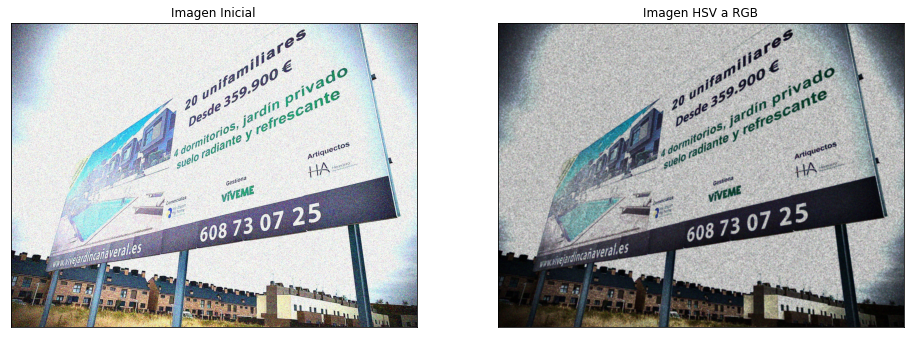

In [5]:
plt.figure(figsize=(16,8)) 

plt.subplot(121)
plt.imshow(img_inicial)
plt.title('Imagen Inicial')
plt.xticks([]), plt.yticks([])


plt.subplot(122)
plt.imshow(img_rgb)
plt.title('Imagen HSV a RGB')
plt.xticks([]), plt.yticks([])

plt.show()

In [6]:
#cv2.imwrite('Imagen Original.png', cv2.cvtColor(img_inicial, cv2.COLOR_BGR2RGB)) #guarda la imagen
#cv2.imwrite('Imagen HSV.png', cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))

In [7]:
MT = np.float32([[1,0,0],[0,1,140],[0,0,1]]) #matriz de translación, 0 en X y 140 en Y
print("Matriz de tranformación de translación:")
print(MT)

Matriz de tranformación de translación:
[[  1.   0.   0.]
 [  0.   1. 140.]
 [  0.   0.   1.]]


In [8]:
img_perspectiva = cv2.warpPerspective(img_rgb, MT, (N, M+140)) #Producto entre imagen y kernel

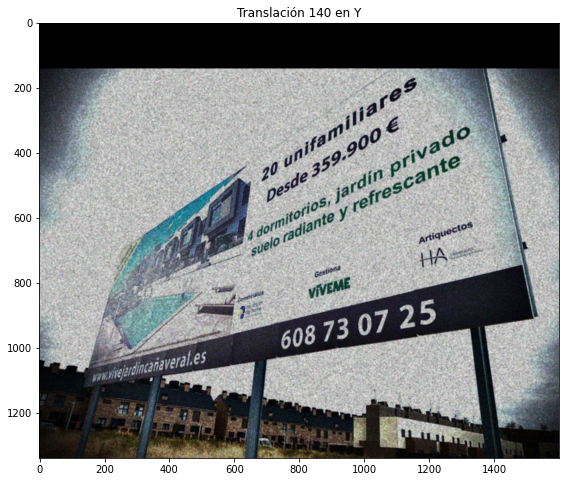

In [9]:
plt.figure(figsize=(16,8)) 
plt.title('Translación 140 en Y')
plt.imshow(img_perspectiva)
plt.show()

In [10]:
#cv2.imwrite('140Y.png', cv2.cvtColor(img_perspectiva, cv2.COLOR_BGR2RGB))

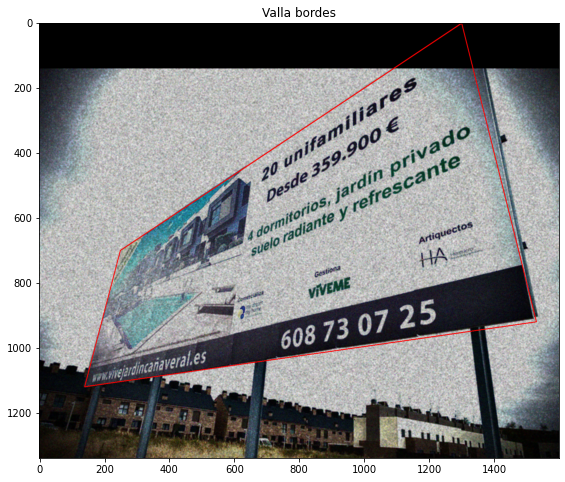

In [11]:
img_rgb_lines= img_perspectiva.copy() #copia de imagen para no modificiar original

orig_pts = [[250,700],[1300,0],[140,1120],[1530,920]] #Selección de puntos de interes para hallar el borde, pts [x,y]

cv2.line(img_rgb_lines, tuple(orig_pts[0]), tuple(orig_pts[1]), (255,0,0),2)
cv2.line(img_rgb_lines, tuple(orig_pts[1]), tuple(orig_pts[3]), (255,0,0),2)
cv2.line(img_rgb_lines, tuple(orig_pts[2]), tuple(orig_pts[3]), (255,0,0),2)
cv2.line(img_rgb_lines, tuple(orig_pts[0]), tuple(orig_pts[2]), (255,0,0),2)

plt.figure(figsize=(16,8))
plt.imshow(img_rgb_lines)
plt.title('Valla bordes')
plt.show()

In [12]:
#cv2.imwrite('Bordes.png', cv2.cvtColor(img_rgb_lines, cv2.COLOR_BGR2RGB))

In [13]:
dest_pts = [[0,0],[400,0],[0,250],[400,250]] #plano destino, pts [x,y] se decide hacer de 250x400

In [14]:
MT= cv2.getPerspectiveTransform(np.array(orig_pts, np.float32),np.array(dest_pts, np.float32)) 
print("Matriz de transformación de perspectiva:")
print(MT)

Matriz de transformación de perspectiva:
[[-9.23577729e+00 -2.41889405e+00  4.00217016e+03]
 [-4.79578867e+00 -7.19368301e+00  6.23452528e+03]
 [-1.61621929e-02 -7.77904771e-03  1.00000000e+00]]


In [15]:
M= 250
N=400
img_trans= cv2.warpPerspective(img_perspectiva, MT, (N,M))

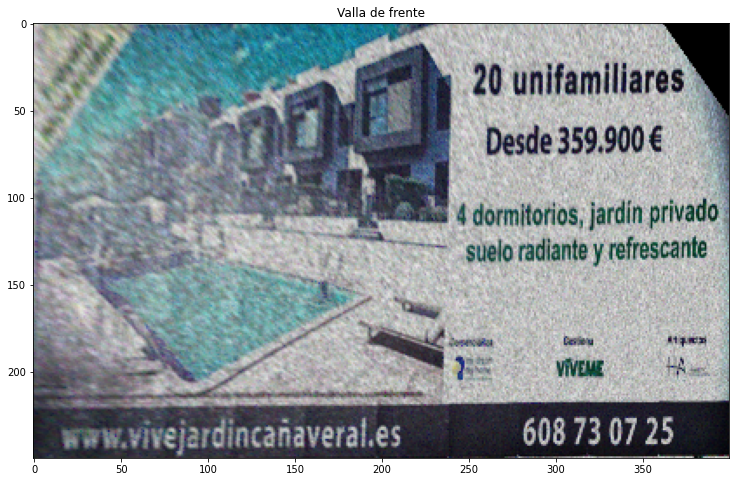

In [16]:
plt.figure(figsize=(16,8)) 
plt.imshow(img_trans)
plt.title('Valla de frente')
plt.show()

In [17]:
#cv2.imwrite('VallaFrente.png', cv2.cvtColor(img_trans, cv2.COLOR_BGR2RGB))

Se normaliza la imagen.

In [18]:
norm_img = np.zeros((500, 500))
norm_img = cv2.normalize(img_trans, norm_img, 0, 255, cv2.NORM_MINMAX)

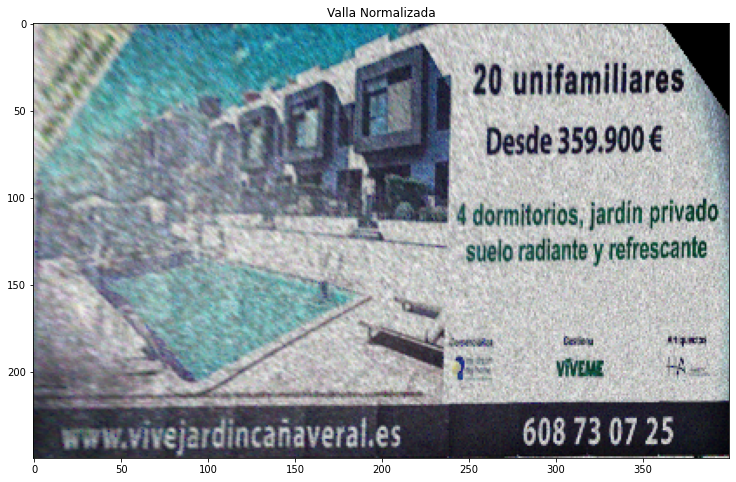

In [19]:
plt.figure(figsize=(16,8)) #crear figuraa de 16 x 8
plt.imshow(norm_img)
plt.title('Valla Normalizada')
plt.show()

In [20]:
#cv2.imwrite('Normalizada.png', cv2.cvtColor(norm_img, cv2.COLOR_BGR2RGB))

Se quiere quitar el ruido con el filtro bilateralFilter, se usa una aproximación de pixeles de 15.

In [21]:
filtro=cv2.bilateralFilter(norm_img,15,80,80) # quitamos el ruido un poco 


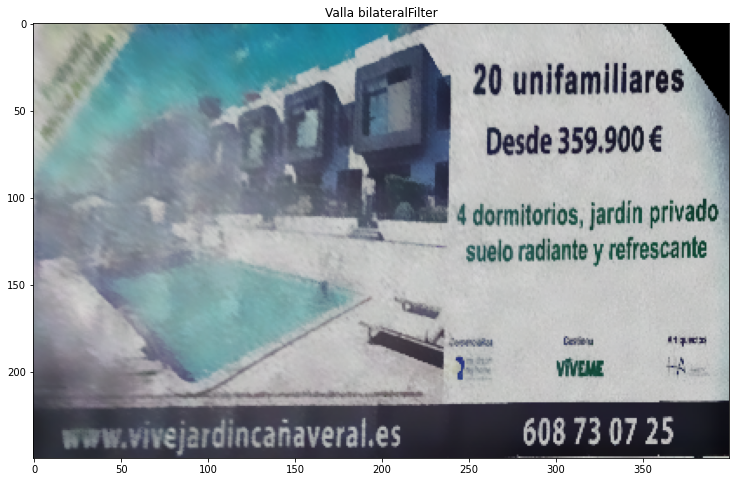

In [22]:
plt.figure(figsize=(16,8))
plt.imshow(filtro)
plt.title('Valla bilateralFilter')
plt.show()

In [23]:
#cv2.imwrite('Bilateral.png', cv2.cvtColor(filtro, cv2.COLOR_BGR2RGB))

In [24]:
img_brillo= np.uint8(filtro-2) #Quitamo -2 a la imagen filtro

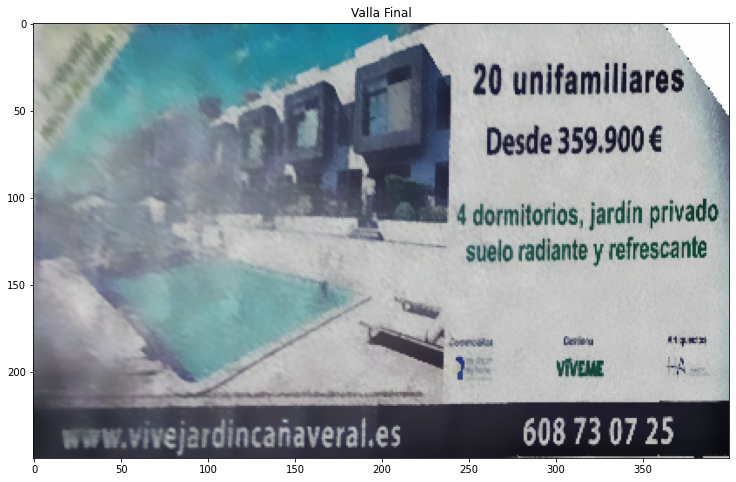

In [25]:
plt.figure(figsize=(16,8)) 
plt.imshow(img_brillo)
plt.title('Valla Final')
plt.show()

In [26]:
#cv2.imwrite('Final.png', cv2.cvtColor(img_brillo, cv2.COLOR_BGR2RGB))